## Assignment 1

In [12]:
import pandas as pd
import numpy as np

In [13]:
telco = pd.read_csv(r'C:/Users/user/Desktop/test/Telco-Customer-Churn.csv')

In [42]:
# first seven entries
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
# all columns except first and last
telco.columns[1:-1]

Index([u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure',
       u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges'],
      dtype='object')

In [81]:
# only 'gender', 'Partner' and 'tenure' columns
telco[['gender','Partner','tenure']]

,gender,Partner,tenure
0,Female,Yes,1
1,Male,No,34
2,Male,No,2
3,Male,No,45
4,Female,No,2
5,Female,No,8
6,Male,No,22
7,Female,No,10
8,Female,Yes,28
9,Male,No,62


In [49]:
# how many male user did churn and how many did not

gend_churn = telco[['gender','Churn']]

male = gend_churn[gend_churn.gender == 'Male']

male_churn = male.groupby('Churn')

count_male_churn = male_churn.count()
count_male_churn

,gender
Churn,
No,2625
Yes,930


In [50]:
# average monthy charges by male users

gen_mcharge = telco[['gender','MonthlyCharges']]

male = gen_mcharge[gen_mcharge.gender == 'Male']
male.mean()


MonthlyCharges    64.327482
dtype: float64

In [51]:
# average monthly charge by male and female users based on churn status

telco.groupby(['gender', 'Churn']).MonthlyCharges.mean()

gender  Churn
Female  No       61.664908
        Yes      74.812087
Male    No       60.876914
        Yes      74.066989
Name: MonthlyCharges, dtype: float64

In [52]:
# min and max monthlycharge by male and female users

telco.groupby(['gender']).MonthlyCharges.agg(['min', 'max'])

,min,max
gender,,
Female,18.40,118.75
Male,18.25,118.35


In [53]:
# percentage of male and female users based on churn status

gend_churn = telco.groupby(['gender','Churn']).gender.count()

churn_count = telco.groupby(['Churn']).Churn.count()

percent_m_w = gend_churn/churn_count*100
print percent_m_w

gender  Churn
Female  No       49.265559
        Yes      50.240770
Male    No       50.734441
        Yes      49.759230
dtype: float64


In [54]:
# churn status based on gender

gend_churn = telco.groupby(['gender','Churn']).gender.count()
print gend_churn

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: gender, dtype: int64


In [55]:
#Calculate the percentage of churn by Internet Service

is_churn = telco.groupby(['InternetService','Churn']).Churn.count()
total_is = telco.groupby(['InternetService']).InternetService.count()
is_churn/total_is*100

InternetService  Churn
DSL              No       81.040892
                 Yes      18.959108
Fiber optic      No       58.107235
                 Yes      41.892765
No               No       92.595020
                 Yes       7.404980
dtype: float64

In [57]:
#Calculate churn of customer by Contract types

telco.groupby(['Contract','Churn']).size()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
dtype: int64

### Scikit-learn & Data Visualization (trying to find relation between partner, totalcharge and churn)

In [18]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'].str.replace(' ',''), errors='force')
#Input missing values

from scipy.stats import mode
mode(telco['TotalCharges'])
telco['TotalCharges'].fillna(mode(telco['TotalCharges']).mode[0], inplace=True)

In [19]:
telco['TotalCharges'].dtypes

dtype('float64')

In [20]:
#change string to numbers

def num(str_p):  
    if str_p == 'Yes':
        return 1
    else:
        return 0

In [21]:
telco['Partner'] = telco['Partner'].apply(num)

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

sns.set()

In [23]:
# churn status based on Partner

p_churn = telco.groupby(['Partner','Churn']).Partner.count()
print p_churn

Partner  Churn
0        No       2441
         Yes      1200
1        No       2733
         Yes       669
Name: Partner, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0D1748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5AC978>], dtype=object)

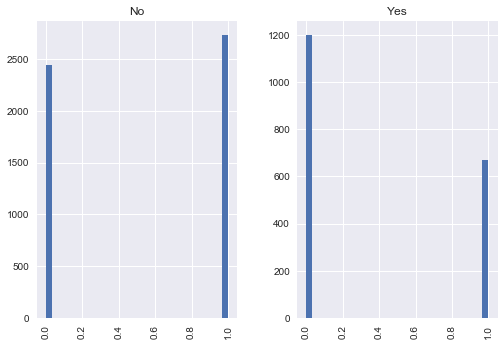

In [24]:
telco.hist(column="Partner",by="Churn",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAC8B38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD49D30>], dtype=object)

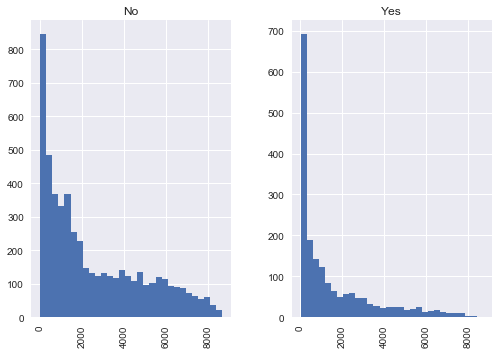

In [25]:
telco.hist(column="TotalCharges",by="Churn",bins=30)

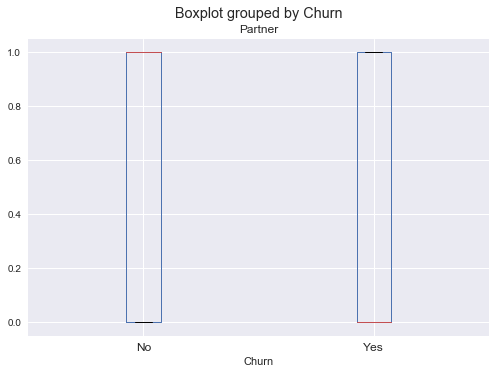

In [26]:
telco.boxplot(column="Partner",by="Churn")

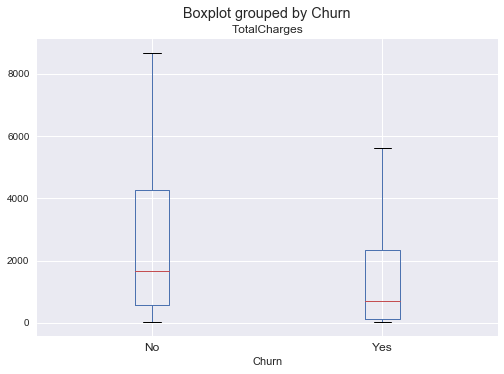

In [27]:
telco.boxplot(column="TotalCharges",by="Churn")

In [28]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

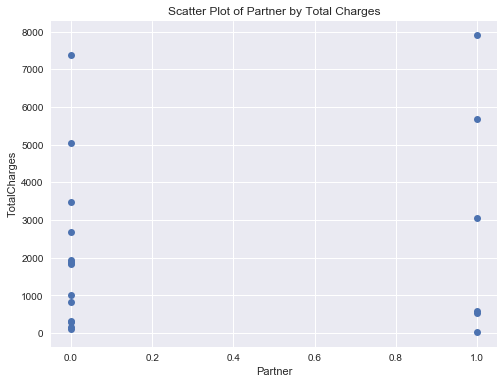

In [71]:
X = telco.Partner[0:20]
Y = telco.TotalCharges[0:20]
plt.ylabel('TotalCharges')
plt.xlabel('Partner')
plt.title('Scatter Plot of Partner by Total Charges')
plt.plot(X, Y, 'o');

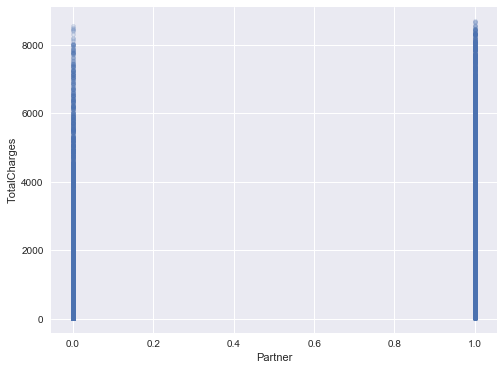

In [29]:
# Pandas scatter plot
telco.plot(kind='scatter', x='Partner', y='TotalCharges', alpha=0.2)

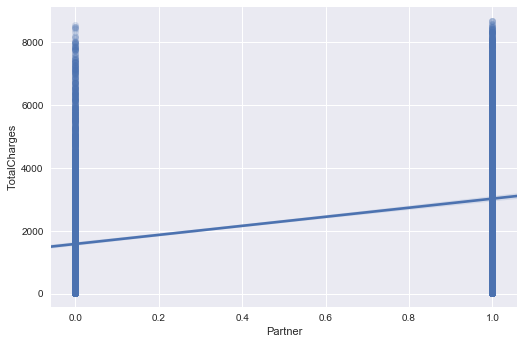

In [30]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Partner', y='TotalCharges', data=telco, aspect=1.5, scatter_kws={'alpha':0.2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EFB6940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010617E48>]], dtype=object)

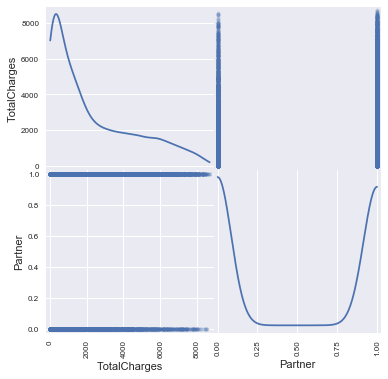

In [31]:
churn = telco.loc[:,['TotalCharges', 'Partner']] 
from pandas.tools.plotting import scatter_matrix
scatter_matrix(churn, alpha=0.2, figsize=(6, 6), diagonal='kde')

Coefficients:
[ 1440.36496294]
Mean squared error: 5719700.15
Variance score: 0.06


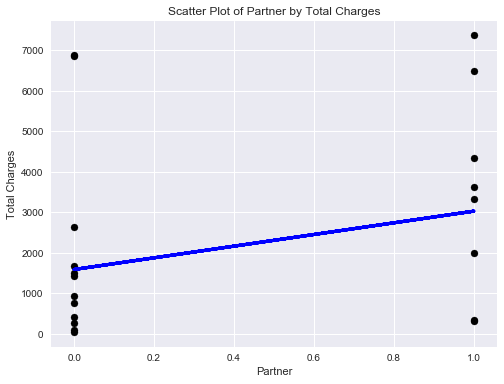

In [32]:
#Linear Model 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

churn_X = churn.Partner[:, np.newaxis]

churn_X_train = churn_X[:-20] #training set
churn_X_test = churn_X[-20:]  #testing set

churn_y_train = churn.TotalCharges[:-20]  #training set
churn_y_test = churn.TotalCharges[-20:]   #testing set

regr = linear_model.LinearRegression()

regr.fit(churn_X_train, churn_y_train)

print ('Coefficients:')
print regr.coef_

print ('Mean squared error: %.2f' % np.mean((regr.predict(churn_X_test) - churn_y_test) ** 2))

print('Variance score: %.2f' % regr.score(churn_X_test, churn_y_test))

plt.scatter(churn_X_test, churn_y_test, color='black')
plt.plot(churn_X_test, regr.predict(churn_X_test), color='blue', linewidth=3)
plt.ylabel('Total Charges')
plt.xlabel('Partner')
plt.title('Scatter Plot of Partner by Total Charges')
plt.show()

In [33]:
feature_cols = ['Partner']
X = telco[feature_cols]
y = telco.TotalCharges

linreg = LinearRegression()
linreg.fit(X, y)

print (linreg.intercept_)
print (linreg.coef_)

1584.10090634
[ 1440.20229765]


In [34]:
telco_cust = telco[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure','MonthlyCharges','TotalCharges','Churn']]
telco_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,29.85,29.85,No
1,Male,0,0,No,34,56.95,1889.50,No
2,Male,0,0,No,2,53.85,108.15,Yes
3,Male,0,0,No,45,42.30,1840.75,No
4,Female,0,0,No,2,70.70,151.65,Yes


In [35]:
def num(strA):  #change string to numbers
    if strA == 'Yes':
        return 1
    elif strA == 'Male':
        return 1
    else:
        return 0

In [36]:
telco_cust['Churn'] = telco_cust['Churn'].apply(num)
telco_cust['gender'] = telco_cust['gender'].apply(num)
telco_cust.head()

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,No,1,29.85,29.85,0
1,1,0,0,No,34,56.95,1889.50,0
2,1,0,0,No,2,53.85,108.15,1
3,1,0,0,No,45,42.30,1840.75,0
4,0,0,0,No,2,70.70,151.65,1


In [37]:
feature_cols = ['gender','Partner','MonthlyCharges', 'tenure', 'Churn']

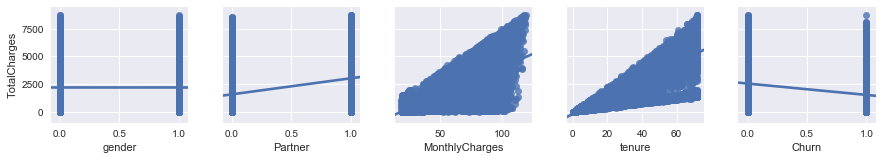

In [38]:
sns.pairplot(telco_cust, x_vars=feature_cols, y_vars='TotalCharges', kind='reg')

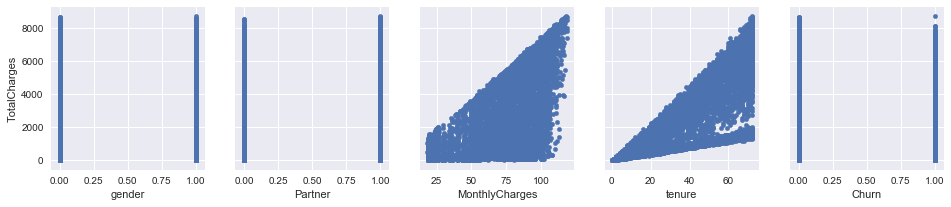

In [39]:
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    telco_cust.plot(kind='scatter', x=feature, y='TotalCharges', ax=axs[index], figsize=(16, 3))

In [40]:
telco_cust.corr()

,gender,SeniorCitizen,Partner,tenure,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.005106,-0.014569,-0.000079,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,0.016567,0.220173,0.103001,0.150889
Partner,-0.001808,0.016479,1.000000,0.379697,0.096848,0.317518,-0.150448
tenure,0.005106,0.016567,0.379697,1.000000,0.247900,0.826172,-0.352229
MonthlyCharges,-0.014569,0.220173,0.096848,0.247900,1.000000,0.651172,0.193356
TotalCharges,-0.000079,0.103001,0.317518,0.826172,0.651172,1.000000,-0.198335
Churn,-0.008612,0.150889,-0.150448,-0.352229,0.193356,-0.198335,1.000000


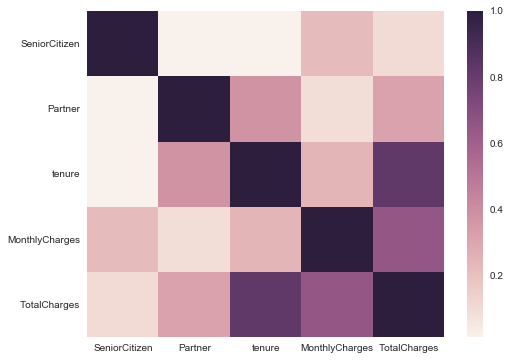

In [41]:
sns.heatmap(telco.corr())